# Project: Investigate a Dataset - TMDB Movies

In [3]:
import pandas as pd #importing pandas with pd alias
import numpy as np #importing numpy with np alias
# pd.set_option('display.max_columns', None) #Showing all columns in pandas dataframes

## Introduction

This dataset contains information about **10,000** movies collected from The Movie Database (TMDb), including user ratings and revenue.

Original and unclean dataset is from **Kaggle** website: [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

Cleaned dataset, is availabe in the `/datasets` directory of this repo

This dataset has 21 columns, including: ```1.id, 2.imdb_id, 3.popularity, 4.budget, 5.revenue, 6.original_title, 7.cast, 8.homepage, 9.director, 10.tagline, 11.keywords, 12.overview, 13.runtime, 14.genres, 15.production_companies, 16.release_date, 17.vote_count, 18.vote_average, 19.release_year, 20.budget_adj, 21.revenue_adj```

In this investigation, we are going to answer some questions.

1. What features affect movie popularity?    - To answer this question, these 4 columns will be investigated: `popularity` (The highest value shows the popularity of this movie among audiences), `budget` (the budget allocated for producing a movie), `revenue` (the revenue earned from a movie), `vote_average` (the average vote on the IMDb website for a movie; the higher, the better).
  
  
2. How has total revenue changed over the years?

3.  How has average revenue changed over the years?
    - By using the `revenue` and `release_year` columns, the average and total revenue over the years will be analyzed.
    
4. What are the peak and low months in revenue stream?  - By extracting the month of movie releases from the `release_date` column and creating a new column called `month` , the `revenue` will be analyzed based on the month of release.

5. Which genre do most movies belong to?

   - By extracting values from the `genres` column and creating a new dataframe called `df_genres`, this investigation will focus on identifying the top movie genres.

6. Who are the top 10 busiest casts?   - By extracting values from the `cast` column and creating a new dataframe called `df_cast`, this investigation will aim to find the busiest casts in movies.

7. Which are the top 10 movie companies?

   - By extracting values from the `production_companies` column and creating a new dataframe called `df_production_companies`, this investigation will focus on identifying the top movie production companies. 

In [4]:
df = pd.read_csv('datasets/tmdb-movies.csv') # Load csv dataset file as a pandas datafrane and add into df variable
print('Columns names:\n' , ", ".join([f"{i+1}.{column}" for i,column in enumerate(df.columns)])) #print all columns name

Columns names:
 1.id, 2.imdb_id, 3.popularity, 4.budget, 5.revenue, 6.original_title, 7.cast, 8.homepage, 9.director, 10.tagline, 11.keywords, 12.overview, 13.runtime, 14.genres, 15.production_companies, 16.release_date, 17.vote_count, 18.vote_average, 19.release_year, 20.budget_adj, 21.revenue_adj


## Data Wrangling


### General Properties
- This dataset contains **10866** samples, and **21** columns.

### Data Cleaning

1. Changing the datatype for `release_date` column.
2. Checking missing values
3. Dropping duplicated
4. Extracting values for unclean columns (`genres` , `keywords` , `cast` , `production_companies`) and create new dataframes to have each value in a certain cell

In [5]:
print('Total number of samples: ' , df.shape[0]) #get total number of samples
print('Total number of columns: ' , df.shape[1]) #get total number of columns

Total number of samples:  10866
Total number of columns:  21


In [6]:
df.head(5) #get 5 first samples in the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.info() #check dataframe genral properties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

`release_date` column requires data type conversion

In [8]:
df['release_date'] = df['release_date'].astype('datetime64[ns]') #convert release_date column datatype to-> datetime format

Checking missing values

- Columns which have missing values: (less than **10866**)
- Some columns have missing values, all of them are non-numerical columns

In [9]:
[f"{i}:{df.shape[0]-df.notnull()[i].sum()}" for i in df.columns if df.notnull()[i].sum() < df.shape[0]] #get number of missed values in each column

['imdb_id:10',
 'cast:76',
 'homepage:7930',
 'director:44',
 'tagline:2824',
 'keywords:1493',
 'overview:4',
 'genres:23',
 'production_companies:1030']

Dropping duplicates

After checking the number of unique values for the `id` column, it's found that the number of unique ids is less then the total number of samples, it means that, probably they are some duplicated samples in the dataset, also we can check it accurately using `.duplicated()` function

In [10]:
print('Repetitive ids: ', df.shape[0] - df['id'].nunique()) #get number of duplicated samples with the same id

Repetitive ids:  1


In [11]:
print('Repetitive samples: ', df.duplicated().sum()) #get number of duplicated samples (almost equal to command above)

Repetitive samples:  1


Removing duplicated sample:

In [12]:
df = df.drop_duplicates() #dropping duplicate samples and save them into df variable

Verify duplicated sample is removed

In [13]:
print('Repetitive samples after removing duplicate(s): ', df.duplicated().sum()) #duplicated samples dropping verification

Repetitive samples after removing duplicate(s):  0


Creating new dataframes from `genres` , `production_companies` and `keywords` columns

Why creating a new one? because it can be used and saved as a seprated dataframe, as a refrence. and it more tidy and clean.

In [14]:
# This is a function for extracting values from a string and producing new dataframe
# This funcion will add the id column, for tracking and merging with the original dataframe
# This function is NOT well-optimized, specially in inserting values into new dataframes and need to be revised

import os
def dataframe_creator(df:pd.DataFrame=df,col_name:str='genres'):
    dataset = f'tmdb_{col_name}.csv'
    if dataset in os.listdir():
        print(f'Dataset is already available at this root: {dataset} no need to regenerate!')
    else:
        print('Creating new dataframe...this operation may takes some time..')
    
        new_df = df[['id']].copy()
        new_columns = df[col_name].apply(lambda x:str(x).split('|')).explode().unique()
    
        for new_column in new_columns:
            new_df[new_column] = df[col_name].apply(lambda x:int(1) if new_column in str(x) else int(0))

        new_df.to_csv(dataset)
        print('Dataset is successfully generated!')
        
    return pd.read_csv(dataset)


In [15]:
df_genres = dataframe_creator(col_name='genres') # creating df_genres dataframe and csv dataset output

Dataset is already available at this root: tmdb_genres.csv no need to regenerate!


In [16]:
df_production_companies = dataframe_creator(col_name='production_companies') #creating df_production_companies datafrane and csv dataset output

Dataset is already available at this root: tmdb_production_companies.csv no need to regenerate!


In [17]:
df_keywords = dataframe_creator(col_name='keywords') #creating df_keywords dataframe and csv dataset output

Dataset is already available at this root: tmdb_keywords.csv no need to regenerate!


In [18]:
df_cast = dataframe_creator(col_name='cast') #creating df_cast dataframe and csv dataset output

Dataset is already available at this root: tmdb_cast.csv no need to regenerate!


In [19]:
!ls # Check the list of the files in the current directory

Investigate_a_Dataset.html
Investigate_a_Dataset.ipynb
Investigate_a_Dataset_tmdb_Farzam Arefi.zip
datasets
tmdb_cast.csv
tmdb_genres.csv
tmdb_keywords.csv
tmdb_production_companies.csv


In [20]:
df['month']= df['release_date'].dt.month #adding month of release as a new column to the dataframe

<a id='eda'></a>
## Exploratory Data Analysis

Summary statistics for all numeric columns (expect `id`)

In [21]:
df.describe().iloc[:,1:] #get dataframe summary statistics


,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,2007-05-14 21:31:25.651173376,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,6.827612
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1975-01-01 00:00:00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,1998-04-17 00:00:00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,2007-08-03 00:00:00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,2012-10-05 00:00:00,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,10.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2074-12-20 00:00:00,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000
std,1.000231,3.091428e+07,1.170083e+08,31.382701,NaN,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,3.441764


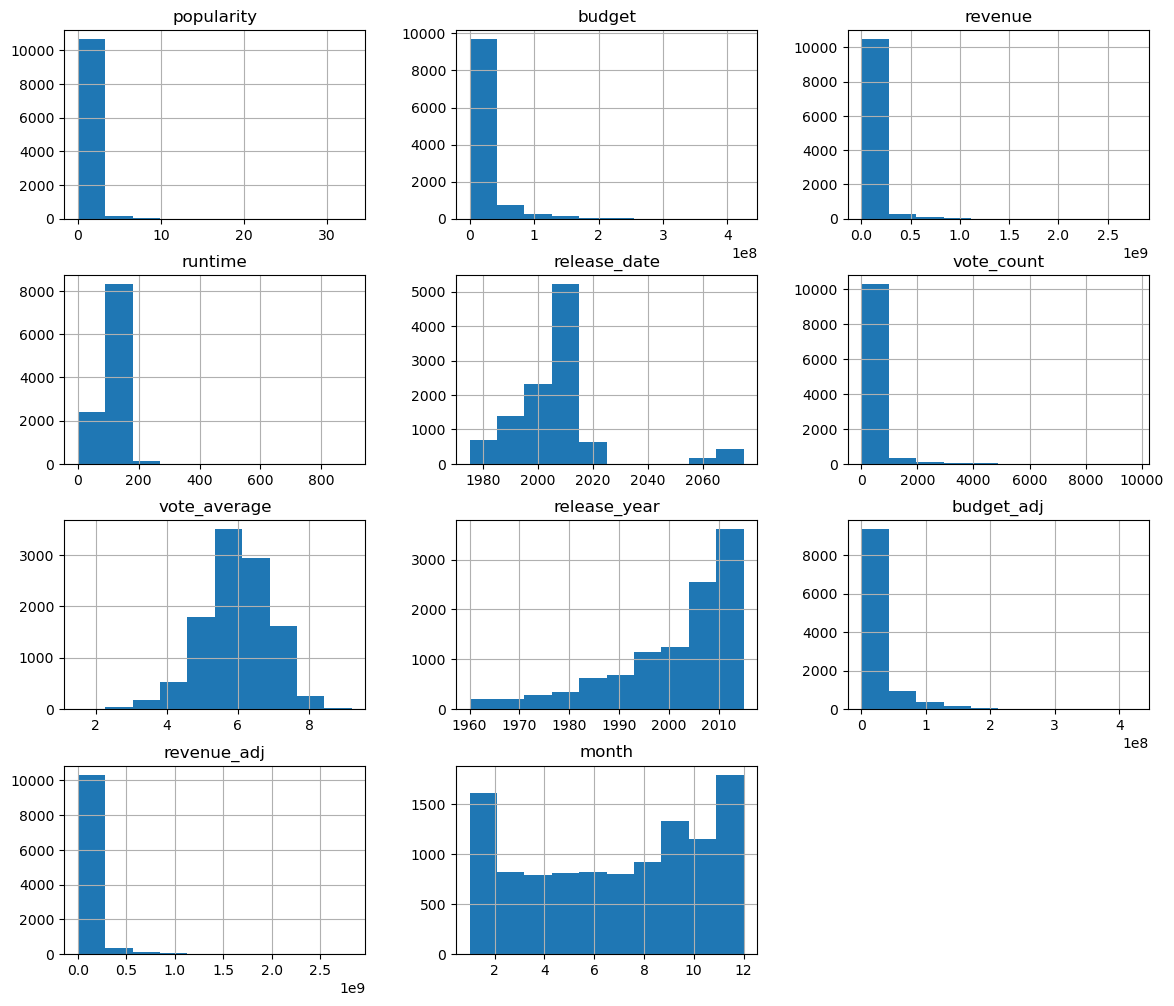

In [22]:
df.iloc[:,1:].hist(figsize=(14,12)); #Histograms for all numeric columns (expect id column)

Histograms for all numeric columns, to show the frequency of the values (expect `id` column), some plots like `release_year` are skwed, and som elike `vote_average` are normally distributed.

Checking all correlations between numerical columns and visualizing them using heatmap

In [23]:
#ref: https://pandas.pydata.org/pandas-docs/version/1.0/reference/api/pandas.DataFrame.select_dtypes.html
df_corr = df.select_dtypes(include='number').corr() #get correlation table between all numeric columns
df_corr

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487,0.041734
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085,0.043240
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531,0.040901
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109,0.038887
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668,0.070795
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941,0.026282
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062,0.073111
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236,-0.046961
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627,0.056706
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000,0.050649


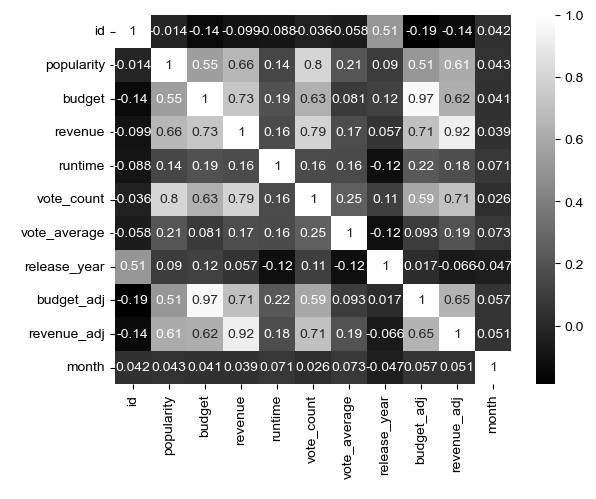

In [24]:
import seaborn as sns #importing seaborn (python advanced visualization library) as sns alias
import matplotlib.pyplot as plt #importing matplotlib visualization library

sns.heatmap(df_corr,annot=True,fmt='.2g' , cmap='gray') #drawing heatmap plot
sns.set_theme(rc={'figure.figsize':(12, 8)}) #set the size of the figure
plt.show() #showing the plot

### What features affect on movies popularity?

In [25]:
df['popularity'].corr(df['budget']) # correlation between popularity and budget columns

0.5454807929309623

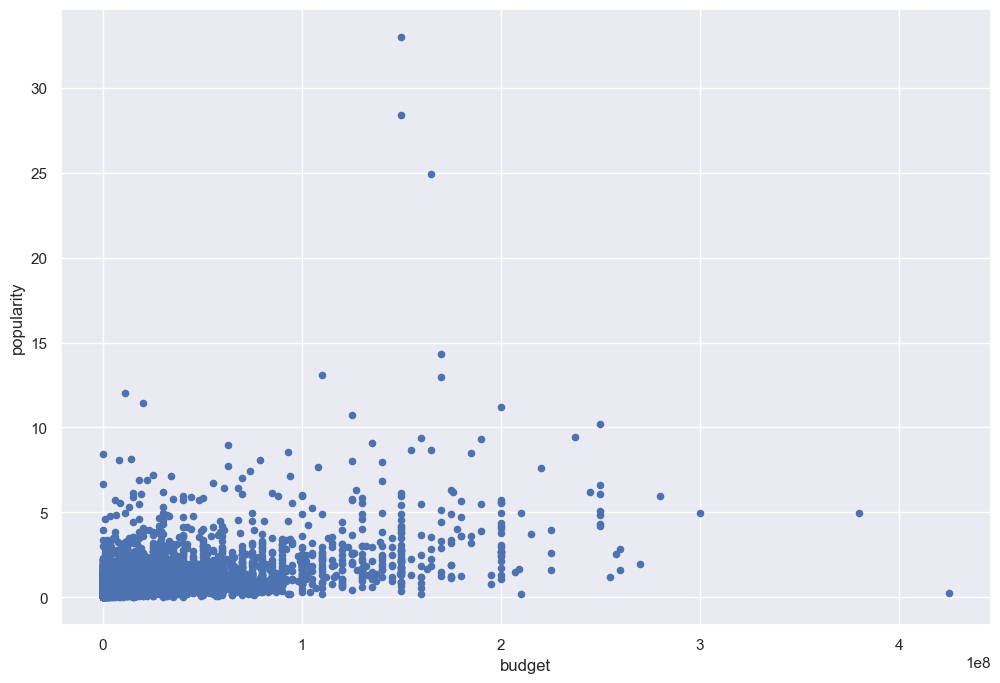

In [26]:
df.plot.scatter(x='budget',y='popularity'); # scatter plot for showing relation between popularity and budget

Budget and being popular have a <font color='green'>positive correlation</font> around **54%** 

In [27]:
df['popularity'].corr(df['vote_average']) #correlation between popularity and vote_average

0.20951701409661433

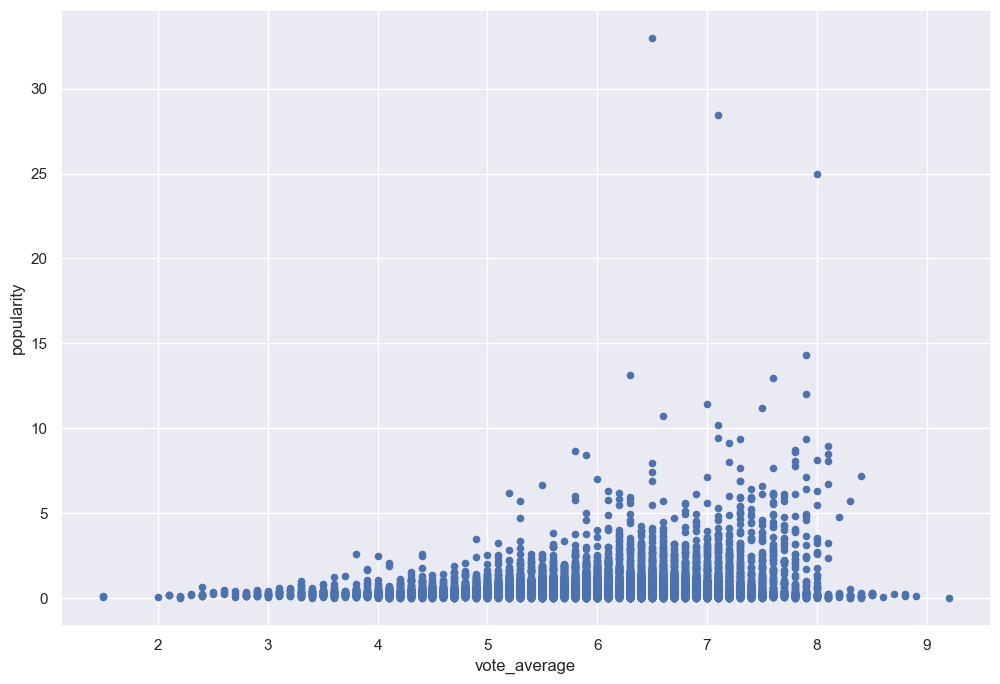

<Figure size 800x800 with 0 Axes>

In [28]:
df.plot(kind='scatter' , x='vote_average',y='popularity') # scatter plot to show relation between budget and popularity
plt.figure(figsize=(8,8))
plt.show()

Average of votes and being popular have a <font color='green'>positive correlation</font> around **20%**

As it is shown in scatter plot above, `popularity` just slightly increase by increasing `vote_average`, and even movies with average vote of bigger than **8** have low `popularity` value!

Popularity and revenue have a <font color='green'>positive correlation</font> around **66%** 

In [29]:
df['popularity'].corr(df['revenue']) #correlation value between popularity and revenue

0.6633602814125903

### How total revenue changed during years?

In [30]:
movie_production_per_year = df.groupby('release_year')['id'].count()

In [31]:
movie_production_ratio = movie_production_per_year.iloc[-1] / movie_production_per_year.iloc[0]
print(f'In 2015 total number of movie productions was approximately {round(movie_production_ratio)} times more than 1960')

In 2015 total number of movie productions was approximately 20 times more than 1960


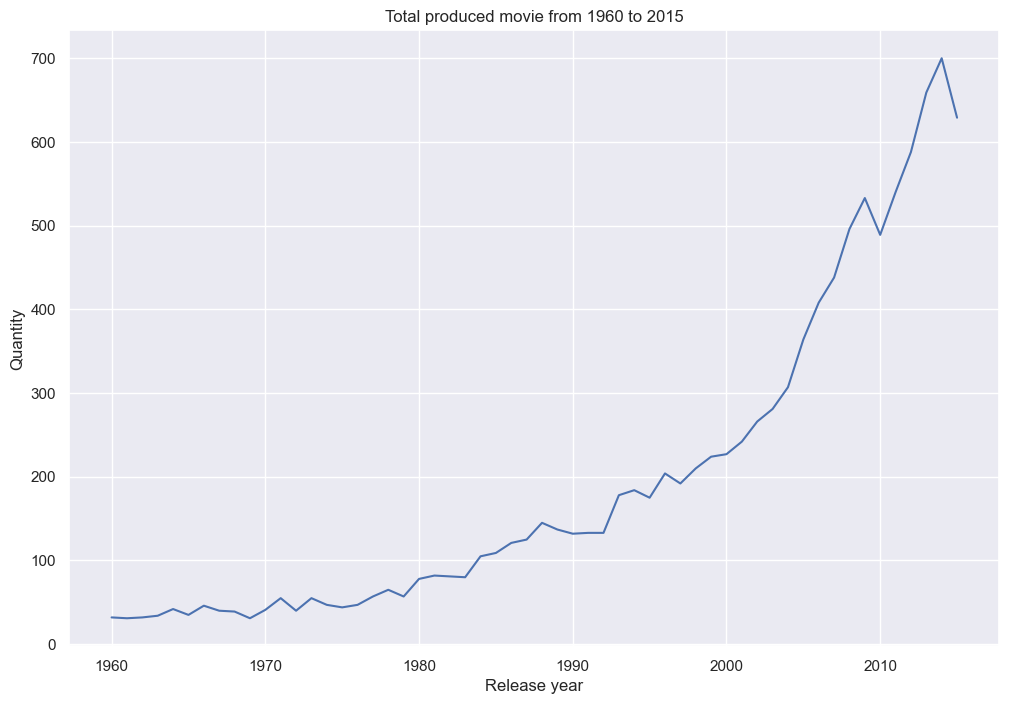

In [32]:
movie_production_per_year.plot(
    kind='line' , title='Total produced movie from 1960 to 2015',
    xlabel = 'Release year' , ylabel ='Quantity'
                  ); # Counting number of produced movies in each year

In line plot above, we can see that the number of movie productions from 1960 to 2015 increased.

In [33]:
rev_sum_years = df.groupby('release_year')['revenue'].sum() #grouping revenue by year

In [34]:
total_movie_revenue_ratio = rev_sum_years.iloc[-1] / rev_sum_years.iloc[0] #divinding the last value (2015) by first value (1960)
print(f'In 2015 total revenue of movie productions was approximately {round(total_movie_revenue_ratio)} times more than 1960')

In 2015 total revenue of movie productions was approximately 185 times more than 1960


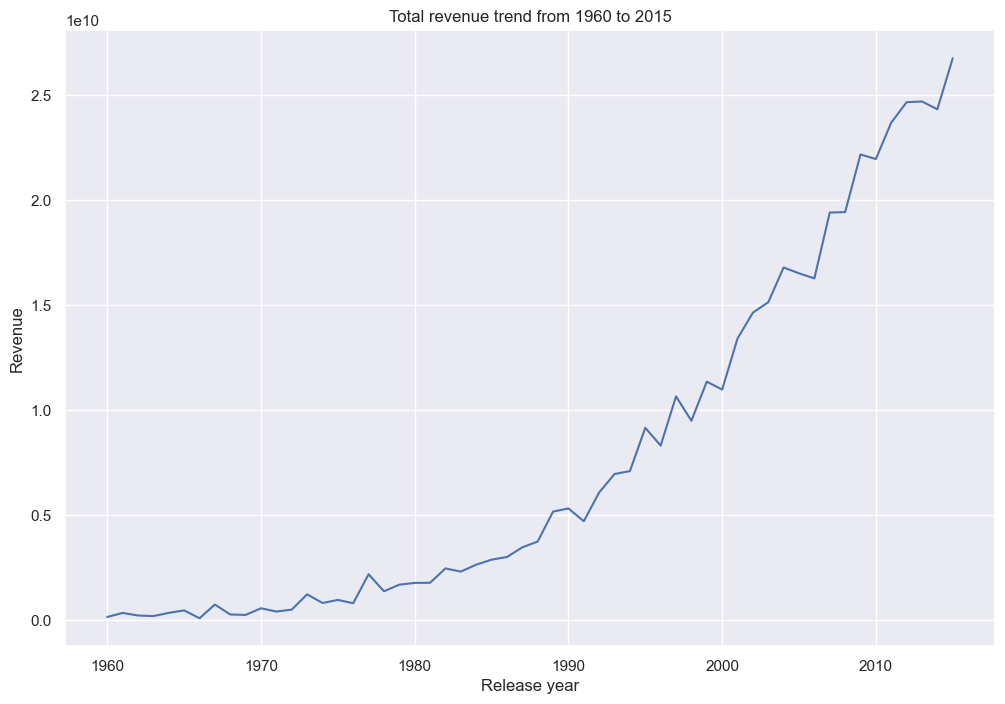

In [35]:
rev_sum_years.plot(
    kind='line' , title='Total revenue trend from 1960 to 2015',
    xlabel = 'Release year' , ylabel ='Revenue'
                  ); # Trend of the sum of revenue in each year

In line plot above, we can see that the total revenue from 1960 to 2015 increased.

### How average revenue changed during years?

In [36]:
rev_avg_years = df.groupby('release_year')['revenue'].mean() # Grouping revenue by year, and calculate the mean for each year

In [37]:
average_movie_revenue_ratio = rev_avg_years.iloc[-1] / rev_avg_years.iloc[0] #divinding the last value (2015) by first value (1960)
print(f'In 2015 average revenue of movie productions was approximately {round(average_movie_revenue_ratio)} times more than 1960')

In 2015 average revenue of movie productions was approximately 9 times more than 1960


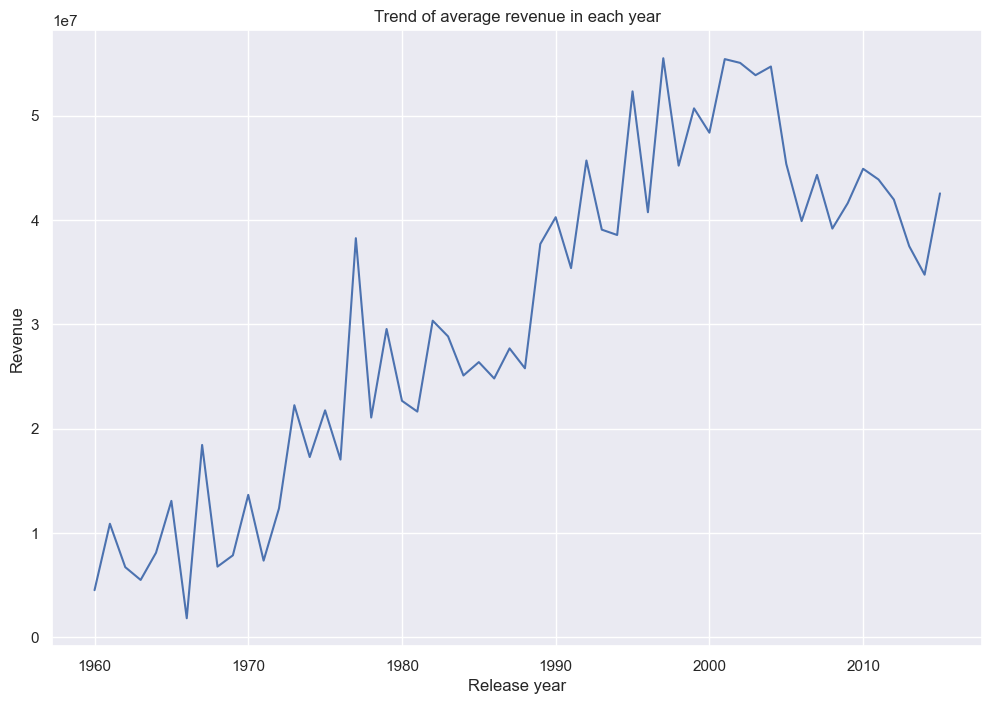

In [38]:
rev_avg_years.plot(kind='line',
                   title='Trend of average revenue in each year',
                   xlabel='Release year',
                   ylabel='Revenue'); # Plotting mean of revenue in each year trend

In the line plot above, we can see that the average revenue increases over the years.

### What are pick month and down month in revenue stream?

In [39]:
rev_avg_month = df.groupby('month')['revenue'].mean() # Grouping revenue by month and calculate the mean

In [40]:
print(f'The {rev_avg_month[rev_avg_month == rev_avg_month.min()].index[0]}st month has the lowest and the {rev_avg_month[rev_avg_month == rev_avg_month.max()].index[0]}th and the maximum value')

The 1st month has the lowest and the 6th and the maximum value


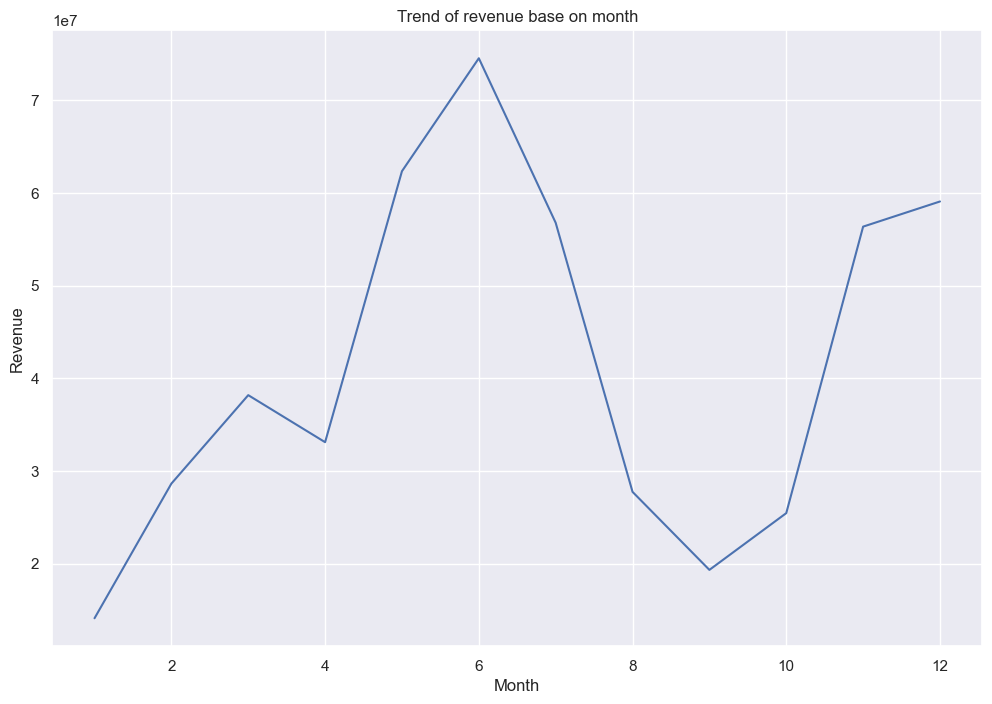

In [41]:
rev_avg_month.plot(kind='line',
                  title='Trend of revenue base on month',
                  xlabel='Month',
                  ylabel='Revenue'); # plotting trend of revenue based on month of release

Min and Max points on this line plot represent the months of January and June.

### Which genre most of the movies belong to?

In [42]:
df_genres = df_genres.drop(['Unnamed: 0','nan'],axis=1) # Dropping redundant columns

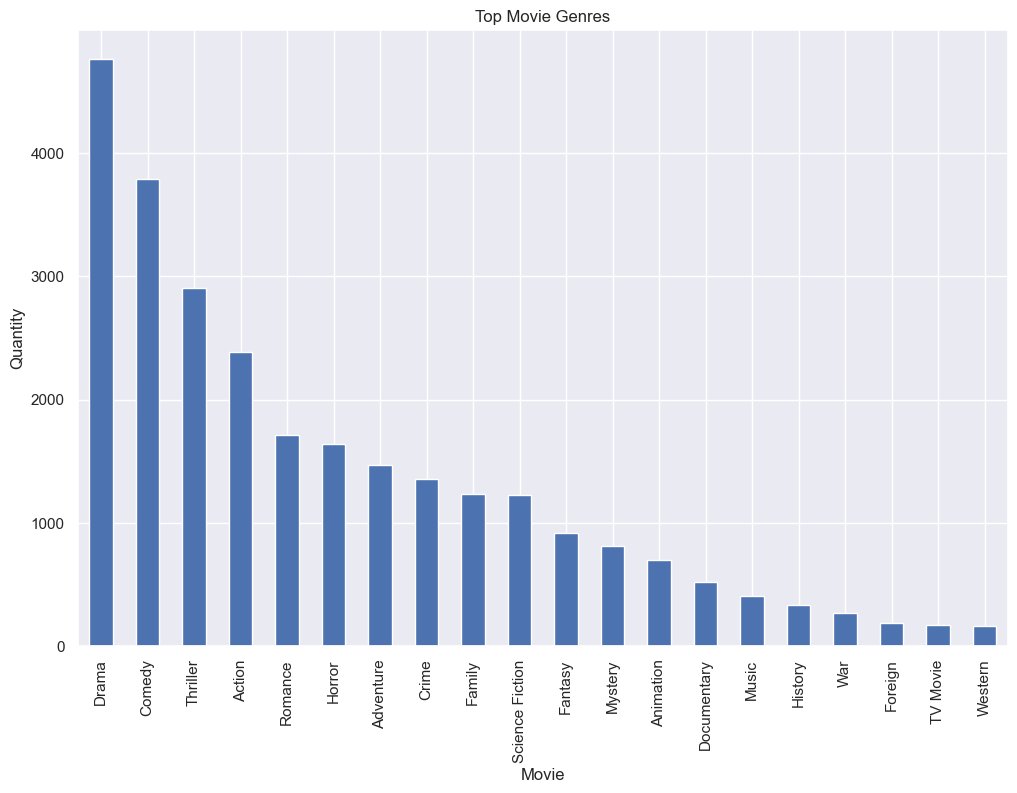

In [43]:
df_genres.iloc[:,1:].sum().sort_values(ascending=False).plot(
    kind='bar',
    title='Top Movie Genres',
xlabel='Movie',
ylabel='Quantity'); #PLotting top movies bar plot in descending view

This plot visualize all genres in movies industry, **Drama** is at the top, and **Western** is at the end of the list.

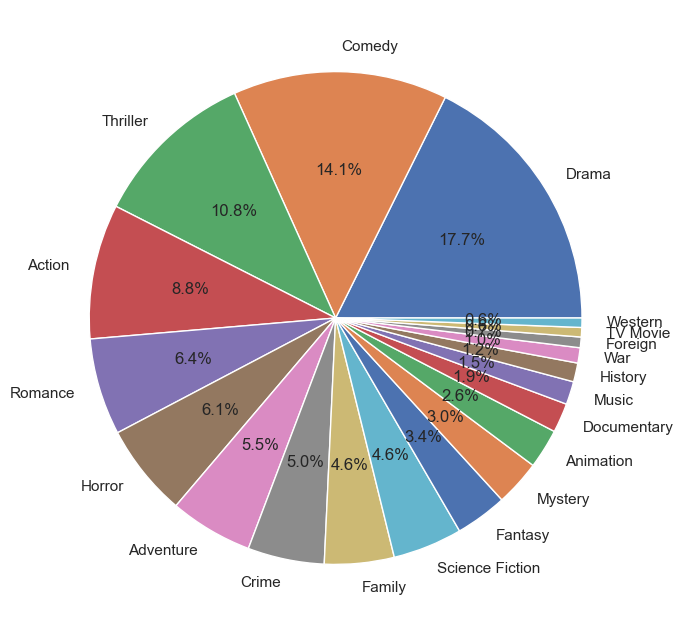

In [44]:
df_genres.iloc[:,1:].sum().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%'); # top genres pie chart

The pie chart of movie genres gives a clearer sense of genre distribution.

In [45]:
df_genres.iloc[:,1:].sum().sort_values(ascending=False)[:4].sum() / df_genres.iloc[:,1:].sum().sort_values(ascending=False).sum() * 100
# calculation for portion of top 4 genres to all other genres

51.35967352995734

### Who are the top 10 busiest casts?

In [46]:
df_cast = df_cast.drop('Unnamed: 0' , axis=1) # Dropping redundant column

In [47]:
anomalies = ['id','Adam' , 'nan' , 'Mars' , 'Eve','Lucy'] # Create list of anamolies values for dropping
print(f'Top 10 busy casts in movies:\n------------------------\n{df_cast.drop(columns=anamolies).sum().sort_values(ascending=False)[:10]}')
# Pronting the name of top 10 busy cast after dropping non-meaningful values

NameError: name 'anamolies' is not defined

In [ ]:
df_cast.drop(columns=anomalies).sum().sort_values(ascending=False)[:10].plot(kind='bar',
                                                                             rot=45,
                                                                            title='Busiest Casts',
                                                                            xlabel='Cast name',
                                                                            ylabel='Number of movies');

Top 10 busy casts bar plot

### Which are top production companies?

In [ ]:
df_production_companies = df_production_companies.drop('Unnamed: 0' , axis = 1) # Dropping redundant column

In [ ]:
top_10_companies = df_production_companies.iloc[:,1:].sum().sort_values(ascending=False)[2:][:10] # passing non-meaningful values and id column and getting the first 10 values

In [ ]:
top_10_companies

In [ ]:
top_10_companies.plot(kind='bar',
                        rot=45,
                        title='Top Companies',
                        xlabel='Company name',
                        ylabel='Number of movies'); # plotting top 10 companies bar plot

Top companies bar plot

<a id='conclusions'></a>
## Conclusions

### Budget is the key factor for a popular movie

let's again review correlation values for popularity
variable | Popularity
-- | -- 
Budget | 54%
Vote Counts | 20%
Revenue | 66%

There is also a significant correlation between Revenue and Budget
variable | Revenue
-- | -- 
Budget | 73%

Based on this result, we can understand that the most important factor in the popularity of a movie is **Budget** with **54%** correlation value. (obviously, revenue is not correlated with popularity and can just be a result of being popular).

However, being popular has only a **20%** correlation with the **average of votes**. This suggests that popularity does not necessarily equate to high reviews or rankings regarding a movie's quality or customer satisfaction.

It may be concluded here that many people paid for movies (in various ways that we do not have enough data to discuss) for reasons that could include advertising, the presence of certain actors, or other factors one might consider (but we can keep this hypothesis in mind). However, they were ultimately not satisfied with the movie to the same extent as the price they paid.

### The revenue of the movie industry in 2015 is 185 times larger than in 1960.

The number of produced movies in 2015 was 20 times more than 1960, but the total income from movies was 185 more than 1960, having the ratio of average of revenue in each year, which in 2015 was 9 times more than 1960, it can be interpreted that not only making more movies made more money, but also each movie on average made 9 times more money compared to 55 years ago.

### June is the best and January is the worst for releasing movies
Also this data relates only to the release of movies, which typically have a sales lifetime after a specific month. Based on trends, if a company wants to launch a movie, June would be the best option.

### More than half of the movies belong to one of these four genres: drama, comedy, thriller, or action.

Approximately **51%** of the movies fall into one of these four genres; note that most are categorized in more than one genre.

### Robert De Niro, the busiest cast

Here is a list of the top 10 busiest casts in movies:

Cast | Movies (count)
-- | --
Robert De Niro    |   72
Samuel L. Jackson  |  71
Bruce Willis     |    62
Nicolas Cage    |     61
Michael Caine    |    53
Robin Williams   |    51
John Cusack       |   50
Morgan Freeman   |    49
John Goodman    |     49
Liam Neeson     |     48

### Warner Bros. Takes the Lead

Here is the list of top 10 companies:

> Note: being on top here refers only to quantitative values, specifically the number of movies, and does not imply the quality (review) of the films.

Company | Movies (count)
-- | --
Warner Bros.      |       621
Universal          |      598
Fox               |       560
Universal Pictures  |     530
Paramount           |     463
Columbia Pictures   |     434
Paramount Pictures  |     433
Disney               |    336
Walt Disney      |        298
Twentieth Century Fox |   295


## Limitations

In this investigation, the number of **audiences** (whether in cinemas or at home) is missing. Additionally, there is no data regarding the breakdown of **marketing solutions** and movie **sales funnels** to assess the impact of advertisements on revenue and determine how much of the revenue comes from word-of-mouth marketing , or what the effect of social media marketing and other types of advertisements might be.

By having data on audience numbers and sales solutions, this investigation could delve into a more detailed analysis of strategies for increasing movie revenue or other targets, such as features that affect popularity.

In [ ]:
# Convert notebook to a .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb